<a href="https://colab.research.google.com/github/prof-eduardo-nunes/unicamp-mineracao_dados/blob/main/regressao_linear/regressao_sensor_prototipo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Lidar com dataframes.
import numpy as np
import pandas as pd

# Lidar com gráficos.
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from bokeh.plotting import figure
from bokeh.io import (show,
                      output_notebook)

#incluir no projeto o arquivo plotting.py
from plotting import (multiple_histograms_plot,
                      bar_plot_with_categorical,
                      plot_confusion_matrix,
                      plot_confusion_matrix_2,
                      plot_roc)

# Lidar com preparação de dados.
from data_prep import data_prep as dp # etapas de preparação dos dados!!! incluir no projeto o arquivo data_prep.py
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     StratifiedKFold)

# Lidar com validação de modelos.
from sklearn.metrics import (confusion_matrix,
                             accuracy_score,
                             classification_report)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 1)
pd.set_option('display.max_rows', 500)

Pandas é uma biblioteca Python de código aberto usada para manipulação e análise de dados.

 É fundamental para a ciência de dados, pois oferece ferramentas para carregar, limpar, transformar, analisar e visualizar dados, especialmente dados estruturados como tabelas.

Em resumo, Pandas serve para:

Manipular dados: Carregar, limpar, filtrar, transformar e modificar dados de diferentes fontes.

Analisar dados: Calcular estatísticas, agrupar dados, fazer análise de regressão, etc.

Visualizar dados: Criar gráficos e visualizações de dados para obter insights.

Trabalhar com DataFrames: DataFrames são estruturas de dados em forma de tabela, que permitem organizar e manipular dados de forma eficiente.


A sklearn, ou scikit-learn (originalmente scikits.learn) é uma biblioteca de aprendizado de máquina de código aberto. Ela inclui vários algoritmos de classificação, regressão e agrupamento incluindo máquinas de vetores de suporte, florestas aleatórias, gradient boosting, k-means e DBSCAN, e é projetada para interagir com as bibliotecas Python numéricas e científicas NumPy e SciPy.

In [55]:
nomeDaBase = "sensor_e_referencia.csv"
df = pd.read_csv(nomeDaBase, sep=",", encoding="utf-8")


In [56]:
df.head(100).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91
referência,"62,35364275","73,39518403","57,54010039","114,316673","114,747442","114,6822656","29,20091037","31,01720286","30,82604351","31,55015893","38,57135761","32,70042554","29,6353864","30,88028474","28,53725187","35,44896171","35,27621481","30,26881495","27,94550702","32,41129356","35,92989673","113,1112408","114,0290134","114,0686856","36,80764067","33,95920007","39,20392896","44,72470816","69,91355859","42,38119817","113,8902441","114,9466525","113,0377587","111,8585286","112,5855165","110,2241147","78,99252951","97,68246438","90,02400798","110,8697597","111,1592295","111,105718","30,19124027","34,21220753","32,40702253","82,62004763","90,07590697","82,15245098","29,83016846","32,23337211","28,48253111","42,86732848","55,79761863","42,02066355","40,64528335","49,9335601","38,48345525","46,23946741","60,49302751","75,8010335","93,96016171","103,7742085","90,81831263","29,98745407","33,77659795","28,43214602","95,3863058","103,2469656","93,70911636","54,086458","42,16566698","42,8163021","106,6721661","108,8539602","102,5798629","48,99960692","49,34499786","40,62591588","113,7475405","113,1365916","113,3081228","36,52462713","45,39576629","35,17576038","42,30975968","46,14640835","40,10779252","54,37634255","43,3268476","53,09691552",media,"64,46873092"
protótipo,"65,00894825","86,98971566","69,02936882","109,124102","104,8253933","109,124102","39,99950462","38,41561305","39,99950462","50,86896246","50,86896246","50,86896246","37,16227359","45,83200379","45,83200379","45,4320194","35,89427471","31,39904199","25,71088019","39,99950462","37,16227359","103,1403252","114,3227446","92,75927068","46,87401988","46,87401988","29,91610823","53,37444394","71,08495173","53,37444394","109,124102","111,5287356","100,6485457","107,7310946","113,4315022","97,64768055","83,60234361","94,14598603","93,29339578","92,75927068","118,7689321","97,64768055","37,16227359","35,89427471","37,16227359","88,45353771","100,6371728","88,41503405","35,04707865","35,89427471","35,89427471","44,23109545","46,41033908","44,43995374","48,84697429","55,54520837","47,65686601","52,53094604","36,43118827","50,52741822","92,66357572","102,320358","95,64420147","32,6983687","38,41561305","39,99950462","103,1972842","96,89530752","99,86981489","41,59744842","39,16809969","41,7807902","92,73886105","118,7689321","110,385369","46,74718665","57,43734761","48,95366235","102,0225847","113,4315022","102,0225847","38,41561305","50,86896246","35,89427471","45,4320194","67,36538148","42,56952016","46,78027171","47,65686601","62,49432803",media,"66,30014256"


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   referência  92 non-null     object
 1   protótipo   92 non-null     object
dtypes: object(2)
memory usage: 1.6+ KB


como o base de dados está com virgula na casa decimal, vamos substituir por ponto, transformar para numerico, preencher os não numéricos com NAN e, por fim, excluir as linhas com NAN

In [60]:

df = df.replace({',': '.'}, regex=True)
df["referência"] = pd.to_numeric(df["referência"], errors="coerce")
df["protótipo"] = pd.to_numeric(df["protótipo"], errors="coerce")
df.dropna(subset=["referência"], inplace=True)
df.head(100).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,91
referência,62.353643,73.395184,57.540100,114.316673,114.747442,114.682266,29.200910,31.017203,30.826044,31.550159,38.571358,32.700426,29.635386,30.880285,28.537252,35.448962,35.276215,30.268815,27.945507,32.411294,35.929897,113.111241,114.029013,114.068686,36.807641,33.95920,39.203929,44.724708,69.913559,42.381198,113.890244,114.946652,113.037759,111.858529,112.585516,110.224115,78.992530,97.682464,90.024008,110.869760,111.159229,111.105718,30.191240,34.212208,32.407023,82.620048,90.075907,82.152451,29.830168,32.233372,28.482531,42.867328,55.797619,42.020664,40.645283,49.933560,38.483455,46.239467,60.493028,75.801034,93.960162,103.774209,90.818313,29.987454,33.776598,28.432146,95.386306,103.246966,93.709116,54.086458,42.165667,42.816302,106.672166,108.853960,102.579863,48.999607,49.344998,40.625916,113.747540,113.136592,113.308123,36.524627,45.395766,35.175760,42.309760,46.146408,40.107793,54.376343,43.326848,53.096916,64.468731
protótipo,65.008948,86.989716,69.029369,109.124102,104.825393,109.124102,39.999505,38.415613,39.999505,50.868962,50.868962,50.868962,37.162274,45.832004,45.832004,45.432019,35.894275,31.399042,25.710880,39.999505,37.162274,103.140325,114.322745,92.759271,46.874020,46.87402,29.916108,53.374444,71.084952,53.374444,109.124102,111.528736,100.648546,107.731095,113.431502,97.647681,83.602344,94.145986,93.293396,92.759271,118.768932,97.647681,37.162274,35.894275,37.162274,88.453538,100.637173,88.415034,35.047079,35.894275,35.894275,44.231095,46.410339,44.439954,48.846974,55.545208,47.656866,52.530946,36.431188,50.527418,92.663576,102.320358,95.644201,32.698369,38.415613,39.999505,103.197284,96.895308,99.869815,41.597448,39.168100,41.780790,92.738861,118.768932,110.385369,46.747187,57.437348,48.953662,102.022585,113.431502,102.022585,38.415613,50.868962,35.894275,45.432019,67.365381,42.569520,46.780272,47.656866,62.494328,66.300143


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 0 to 91
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   referência  91 non-null     float64
 1   protótipo   91 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB


In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
referência,91.0,64.468731,32.656087,27.945507,35.362588,49.344998,100.131164,114.946652
protótipo,91.0,66.300143,28.951985,25.710880,40.798477,50.868962,96.269754,118.768932


**Breve análise da base:**

não há nulos;

só existem duas variáveis, a adubacao (variável independente) e a produtividade (variável dependente);

e não há valores que apresentam incosistências (ex.: negativos quando não é possível).

In [63]:
# Separando os fatores/previsores da resposta/target:

x = df.iloc[:, 0].values.reshape(-1,1)
y = df.iloc[:, 1].values.reshape(-1,1)
print("x reshape:")
print(x)
print("y reshape:")
print(y)
# IMPORTANTE! Tive que fazer um reshape nos valores de x e y.

x reshape:
[[ 62.35364275]
 [ 73.39518403]
 [ 57.54010039]
 [114.316673  ]
 [114.747442  ]
 [114.6822656 ]
 [ 29.20091037]
 [ 31.01720286]
 [ 30.82604351]
 [ 31.55015893]
 [ 38.57135761]
 [ 32.70042554]
 [ 29.6353864 ]
 [ 30.88028474]
 [ 28.53725187]
 [ 35.44896171]
 [ 35.27621481]
 [ 30.26881495]
 [ 27.94550702]
 [ 32.41129356]
 [ 35.92989673]
 [113.1112408 ]
 [114.0290134 ]
 [114.0686856 ]
 [ 36.80764067]
 [ 33.95920007]
 [ 39.20392896]
 [ 44.72470816]
 [ 69.91355859]
 [ 42.38119817]
 [113.8902441 ]
 [114.9466525 ]
 [113.0377587 ]
 [111.8585286 ]
 [112.5855165 ]
 [110.2241147 ]
 [ 78.99252951]
 [ 97.68246438]
 [ 90.02400798]
 [110.8697597 ]
 [111.1592295 ]
 [111.105718  ]
 [ 30.19124027]
 [ 34.21220753]
 [ 32.40702253]
 [ 82.62004763]
 [ 90.07590697]
 [ 82.15245098]
 [ 29.83016846]
 [ 32.23337211]
 [ 28.48253111]
 [ 42.86732848]
 [ 55.79761863]
 [ 42.02066355]
 [ 40.64528335]
 [ 49.9335601 ]
 [ 38.48345525]
 [ 46.23946741]
 [ 60.49302751]
 [ 75.8010335 ]
 [ 93.96016171]
 [103.7742085

In [64]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(x, y)

y_pred = regressor.predict(x)

In [65]:
print("Intercepto = {:.3f}".format(regressor.intercept_[0]))
print("Inclinação = {:.3f}".format(regressor.coef_[0][0]))

Intercepto = 11.390
Inclinação = 0.852



**Visualisando:**

In [66]:
reta_x = np.linspace(min(x)-5, max(x)+5,100).reshape(-1,1)
reta_y = regressor.predict(reta_x)
reta_df = np.concatenate((reta_x, reta_y), axis=1)
reta_df = pd.DataFrame(reta_df, columns=("x_referência", "y_protótipo"))

<ipython-input-67-1edd89403e75>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x="x_referência", y="y_protótipo", data=reta_df, alpha=0.3, palette="red");


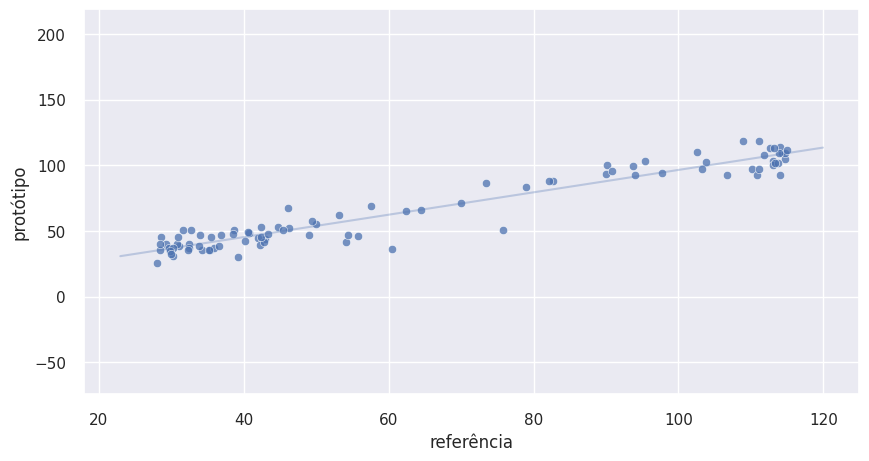

In [67]:
sns.set()
dimensoes = (10,5)
fig, ax = plt.subplots(figsize=dimensoes)
ax.set(xlim = (min(x)-10, max(x)+10),ylim=(min(y)-100, max(y)+100))
ax = sns.scatterplot(x="referência", y="protótipo", data=df, alpha=0.75);
ax = sns.lineplot(x="x_referência", y="y_protótipo", data=reta_df, alpha=0.3, palette="red");

**Verificando o como o modelo se saiu**

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

print("MSE: {:.3f}".format(mean_squared_error(y, y_pred)))
print("RMSE: {:.3f}".format(np.sqrt(mean_squared_error(y, y_pred))))
print("MAE: {:.3f}".format(mean_absolute_error(y, y_pred)))
print("MAPE: {:.3f}".format(mean_absolute_percentage_error(y, y_pred)))
print("R2: {:.3f}".format(r2_score(y, y_pred)))

################################################################################
# Cálculo do R2 ajustado:
def r2_ajustado(x, y, y_pred):
    """
    r2_ajustado retorna o R² Ajustado e recebe como argumento as séries com o
    valor alvo teste e o predito.
    """
    n = x.shape[0]
    k = x.shape[1]
    return (1-((n-1)/(n-(k+1)))*(1-r2_score(y, y_pred)))
################################################################################

print("R2 Ajustado: {:.3}".format(r2_ajustado(x, y, y_pred)))

MSE: 63.870
RMSE: 7.992
MAE: 6.071
MAPE: 0.108
R2: 0.923
R2 Ajustado: 0.922


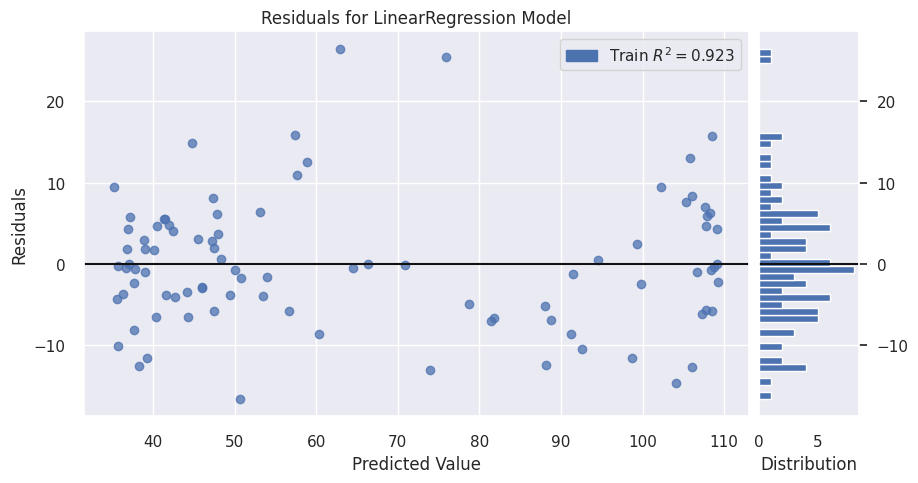

In [69]:
from yellowbrick.regressor import ResidualsPlot

sns.set()
dimensoes = (10,5)
fig, ax = plt.subplots(figsize=dimensoes)

visualizador = ResidualsPlot(regressor)
visualizador.fit(x, y)
visualizador.poof();